# Define the libraries

In [204]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta

# Define Function

In [205]:
def PlotData(Begin,Duration,Mistake,OncourtFrame,OncourtVideo,Time,Data1,Data2,Figuur,player,pdf):
    Start = int((((OncourtFrame - OncourtVideo)*100) + Begin/10) - Mistake*100)
    Stop = int(Start + Duration*100)
    fig, ax = plt.subplots()
    ax.plot(Time[Start:Stop],Data1[Start:Stop],'r',Time[Start:Stop],Data2[Start:Stop],'b')
    ax.legend(['Wheel Rotation Speed','Frame Rotation Speed'])
    ax.set_xlabel('Time (sec)')
    ax.set_title("Fast offence " + str(Figuur) + ", " + str(player) + ", Video Time = " + str(timedelta(seconds=(int(Begin/1000)-Mistake))))
    pdf.savefig()

# Visualize Data
## Define player and match

In [206]:
Player = 8
Game = 2

## Insert Data player

In [207]:
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.000000,0.0,0.0,0.0000,0.00000,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,0.000000,0.0,0.0,0.0000,0.00000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,0.000000,0.0,0.0,0.0000,0.00000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,0.000000,0.0,0.0,0.0000,0.00000,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,0.000000,0.0,0.0,0.0000,0.00000,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767580,-0.141610,4995.7,4011.8,-5.7383,-0.15038,7675.80,-0.28778,0.70778,-7.4978,-20.168,6.3622,3.8344,-21.853
767581,-0.091962,4995.7,4011.7,-5.9568,-0.15179,7675.80,-0.42636,0.77000,-7.7127,-20.216,6.3280,3.6960,-29.739
767582,-0.041869,4995.7,4011.6,-6.2542,-0.15271,7675.80,-0.45500,0.70000,-8.0150,-20.104,6.4960,3.5840,NaN
767583,NaN,NaN,NaN,NaN,NaN,NaN,-0.34222,0.51333,-8.3456,-19.880,6.7511,3.3444,NaN


## Define boundaries
### Get Timestamps from CSV

In [208]:
df_Action_Player = df_Action.loc[df_Action["Players Group Box"] == ("Player " + str(Player))]
df_Action_Player_Fast_defence = df_Action_Player.loc[df_Action_Player["Player"] == "Fast offense"]#.iloc[::-1]
Timestamp = df_Action_Player_Fast_defence.Position.to_numpy()
print(len(Timestamp))
Timestamp

7


array([1311200, 2872960, 3705560, 3969520, 4092760, 4356240, 4397320])

### Synchronize
Times consist of the oncourt times in the video and the oncourt frames in Matlab

In [209]:
Times = [
         [(13*60+59.16),2829.5],
         [((29*60)+14.48),4577.6],
         [((46*60)+57.08),5838.5],
         [((60*60)+48.60),6683.7]
        ]
Times[0][0]

839.16

In [210]:
Error = [5,5,5,5,5,5,5]
print(len(Error))

7


### Visualize

In [211]:
pdf = PdfPages('Player_' + str(Player) + '_' + str(Game) + '_fastdefences.pdf')

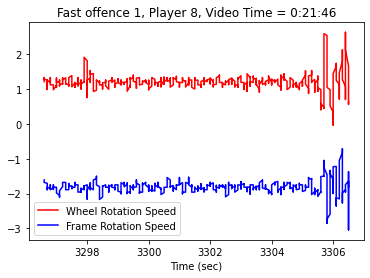

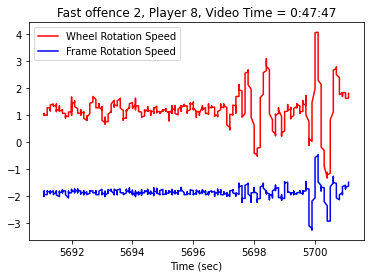

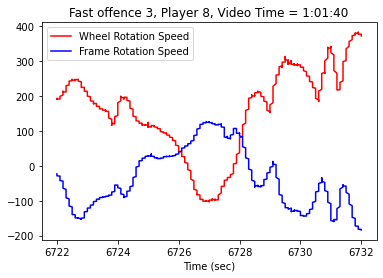

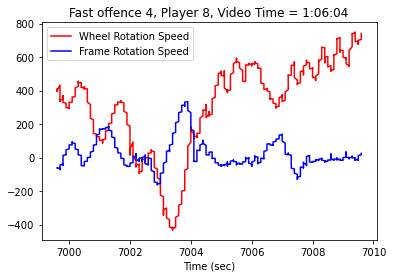

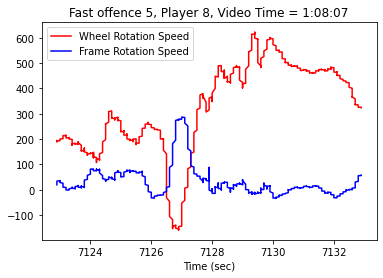

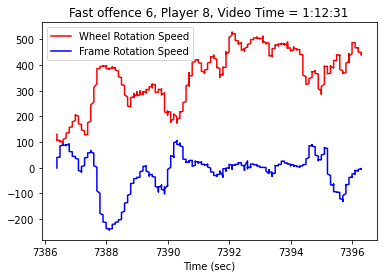

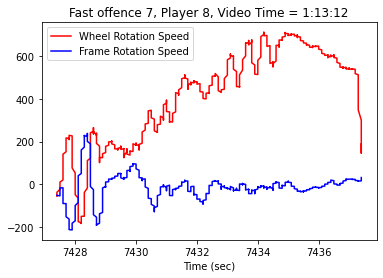

In [212]:
Quator = 0;
for i in range(0,len(Timestamp)):
    if Quator < (len(Times)-1):
        if Timestamp[i] >= (Times[Quator+1][0] * 1000):
            Quator = Quator + 1
    PlotData(Timestamp[i], 10, Error[i], Times[Quator][1], Times[Quator][0], df_Player.timeLine.to_numpy(), 
             df_Player.wheelRotationalSpeedX.to_numpy(), 
             df_Player.frameRotationalSpeedZ.to_numpy(),
             i+1,('Player ' + str(Player)), pdf)

In [213]:
pdf.close()